In [16]:
import pandas as pd
from collections import Counter


In [17]:
df = pd.read_excel('cleaned_dataset.xlsx')
df.head()

,Carimbo de data/hora,id_integer,role,years_exp,org_size,org_field,agile_methods,use_metrics_planning,use_metrics_review,use_metrics_weekly,use_metrics_daily,use_metrics_retro,use_metrics_na,metrics_category,sanitized_metrics
0,17:34:49,1,Product manager,0 a 5,Microempresa,energia,"Scrum, Kanban",Métricas,NaN,Métricas,NaN,NaN,NaN,"Cronograma e progresso, Produto, Tecnologia, C...",Ideal team capacity
1,17:57:23,2,Desenvolvedor(a),0 a 5,Microempresa,Financeiro,"Scrum, Kanban",Métricas,Métricas,NaN,NaN,NaN,NaN,"Cronograma e progresso, Produto, Cliente","NPS, Burndown, Outstanding bugs, Throughput, N..."
2,20:50:58,3,Product manager,0 a 5,Pequena empresa,Eventos,Scrum,Gerenciamento de riscos,Métricas,NaN,Gerenciamento de riscos,"Gerenciamento de riscos, Métricas",NaN,"Cronograma e progresso, Pessoas, Produto","Burndown, OKR, Quantidade de solicitações de c..."
3,22:26:06,4,Team leader,6 a 9,Microempresa,gestão,"Scrum, Kanban","Gerenciamento de riscos, Métricas",Gerenciamento de riscos,Gerenciamento de riscos,Gerenciamento de riscos,Métricas,NaN,"Cronograma e progresso, Produto, Cliente","CAC, Throughput, Roadmaps, Conversão"
4,19:07:11,5,Product manager,0 a 5,Pequena empresa,Agronegocio,"Scrum, Kanban","Gerenciamento de riscos, Métricas",Métricas,NaN,NaN,Métricas,NaN,Cronograma e progresso,"User Story Points, NPS"


In [18]:
df['agile_methods'] = df['agile_methods'].fillna('')

In [19]:
# Dividir a coluna de métodos ágeis para cada método se tornar um termo único
df['agile_methods_split'] = df['agile_methods'].apply(lambda x: x.split(', '))

In [20]:
# Explorar os métodos ágeis únicos no dataset
unique_methods = set()
df['agile_methods_split'].apply(unique_methods.update)

0      None
1      None
2      None
3      None
4      None
       ... 
205    None
206    None
207    None
208    None
209    None
Name: agile_methods_split, Length: 210, dtype: object

In [21]:
# Contar a frequência de cada método ágil
all_methods = [method for methods in df['agile_methods_split'] for method in methods]
methods_counter = Counter(all_methods)

# Criar um DataFrame a partir do contador de métodos
methods_freq_df = pd.DataFrame(methods_counter.items(), columns=['Method', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Mostrar as 5 primeiras linhas
methods_freq_df.head()

,Method,Frequency
0,Scrum,172
1,Kanban,154
4,ScrumBan,80
2,Lean,62
5,XP,25


In [22]:
import matplotlib.pyplot as plt

/var/folders/5j/0g6pzkwj7_g1p9xwqx5jfgq80000gn/T/ipykernel_92732/2745089449.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


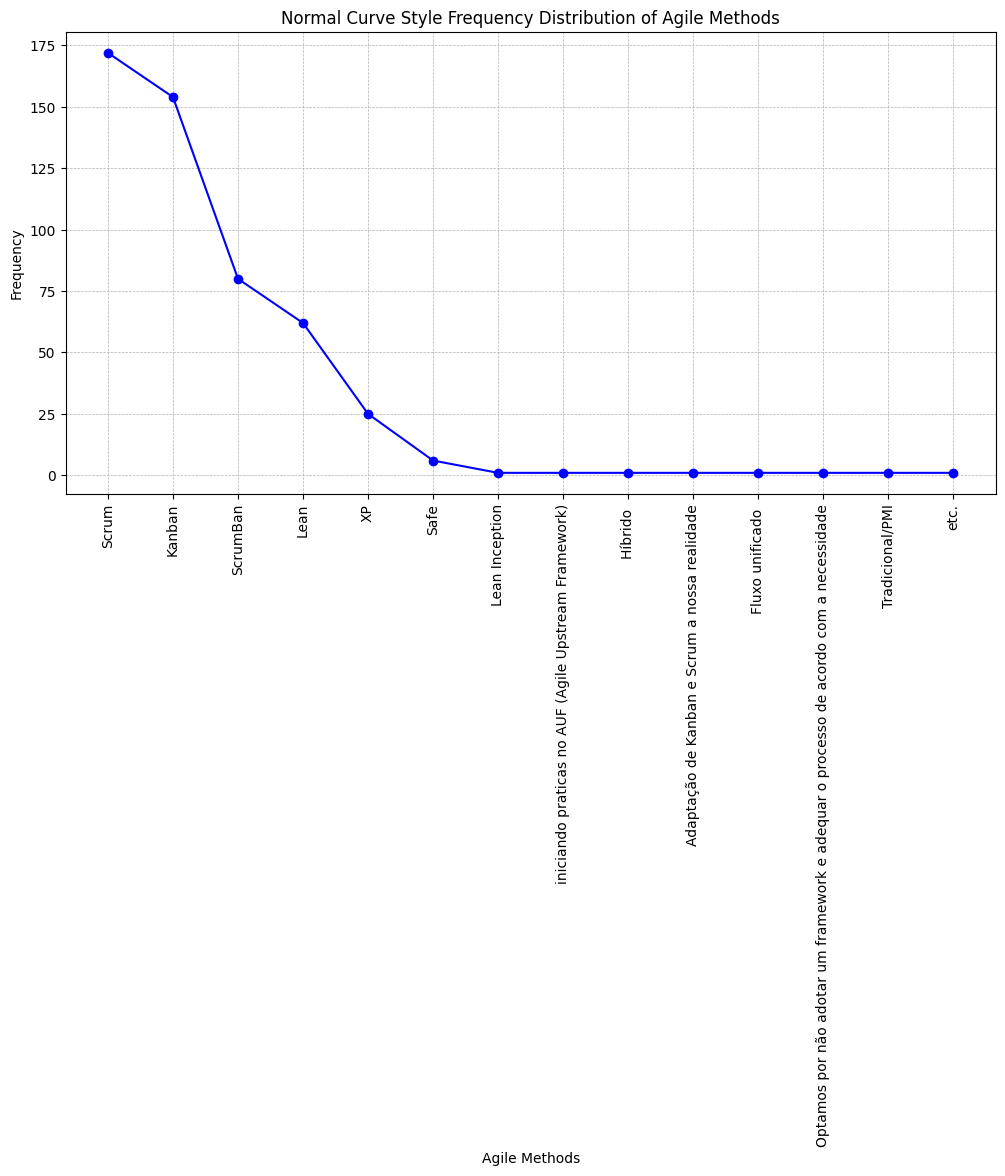

In [23]:
methods_freq_sorted = methods_freq_df.sort_values(by='Frequency', ascending=False)

# Extrair os valores para o eixo x (métodos) e y (frequência)
methods = methods_freq_sorted['Method']
frequencies = methods_freq_sorted['Frequency']

# Plotar a distribuição de frequência
plt.figure(figsize=(12, 6))
plt.plot(range(len(methods)), frequencies, marker='o', linestyle='-', color='blue')
plt.xticks(range(len(methods)), methods, rotation=90)
plt.xlabel('Agile Methods')
plt.ylabel('Frequency')
plt.title('Normal Curve Style Frequency Distribution of Agile Methods')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [24]:
# Identificar os métodos ágeis cuja frequência é menor que 2
outliers = methods_freq_df[methods_freq_df['Frequency'] < 2]

# Mostrar os métodos identificados como outliers
print("Métodos Ágeis Identificados como Outliers (Frequência < 2):")
print(outliers)

Métodos Ágeis Identificados como Outliers (Frequência < 2):
                                               Method  Frequency
6                                      Lean Inception          1
7   iniciando praticas no AUF (Agile Upstream Fram...          1
8                                            Híbrido           1
9       Adaptação de Kanban e Scrum a nossa realidade          1
10                                   Fluxo unificado           1
11  Optamos por não adotar um framework e adequar ...          1
12                                    Tradicional/PMI          1
13                                               etc.          1


In [25]:
# Obter os métodos considerados outliers
outliers_methods = set(outliers['Method'])

# Remover os métodos ágeis que são outliers da coluna 'agile_methods_split'
df['agile_methods_filtered'] = df['agile_methods_split'].apply(lambda x: [method for method in x if method not in outliers_methods])

# Mostrar o dataset atualizado com a coluna de métodos filtrados
df[['agile_methods', 'agile_methods_filtered']].head()

,agile_methods,agile_methods_filtered
0,"Scrum, Kanban","[Scrum, Kanban]"
1,"Scrum, Kanban","[Scrum, Kanban]"
2,Scrum,[Scrum]
3,"Scrum, Kanban","[Scrum, Kanban]"
4,"Scrum, Kanban","[Scrum, Kanban]"


In [26]:
metrics_df = pd.read_excel('extracted_metrics.xlsx', sheet_name='Extracted metrics')
metrics_df.head()

,Metric #,Metric Name,Source (primary study #),Name of metric by primary study,Metric Description,Common Issue Area (PSM Classification),Translation
0,1,Individual effectiveness,S12,Individual effectiveness,n/i,Resources and Cost,Pessoas
1,1,NaN,S13,Individual performance,Individual performance: contribution to value\...,Resources and Cost,Pessoas
2,2,Weekly working hours of individual,S12,Weekly working hours of individual,n/i,Resources and Cost,Pessoas
3,3,Individual effective available hours,S12,Individual effective available hours,n/i,Resources and Cost,Pessoas
4,4,Individual Contribution,S11,Contribution,Measures the direct participation and quality ...,Resources and Cost,Pessoas


In [27]:
metrics_df['Metric Name'].fillna('')

0                               Individual effectiveness
1                                                       
2                     Weekly working hours of individual
3                   Individual effective available hours
4                                Individual Contribution
                             ...                        
315                                         Focus factor
316                           Weighted Methods per Class
317                          Effort spent outside sprint
318                                                     
319    n/i = Not Informed. It was not possible to ext...
Name: Metric Name, Length: 320, dtype: object

In [28]:
# Obter os valores únicos da coluna "Metric Name" do dataset metrics_df, normalizando-os
unique_metrics_df = set(metric.strip().lower() for metric in metrics_df['Metric Name'].dropna().unique())

# Função para comparar os valores de "sanitized_metrics" com os valores únicos de "Metric Name"
def compare_metrics(sanitized_metrics):
    # Normalizar a lista de métricas sanitizadas
    metrics_list = [metric.strip().lower() for metric in sanitized_metrics.split(',')]
    
    # Comparar os valores normalizados
    return [metric for metric in metrics_list if metric in unique_metrics_df]


# Aplicar a função de comparação na coluna "sanitized_metrics" do dataset df
df['matched_metrics'] = df['sanitized_metrics'].apply(compare_metrics)

# Mostrar o dataset atualizado com a nova coluna de métricas correspondentes
df[['sanitized_metrics', 'matched_metrics']].head()

,sanitized_metrics,matched_metrics
0,Ideal team capacity,[ideal team capacity]
1,"NPS, Burndown, Outstanding bugs, Throughput, N...","[nps, burndown, outstanding bugs, throughput, ..."
2,"Burndown, OKR, Quantidade de solicitações de c...","[burndown, velocity]"
3,"CAC, Throughput, Roadmaps, Conversão",[throughput]
4,"User Story Points, NPS","[user story points, nps]"


In [29]:
# Função para comparar os valores de "sanitized_metrics" com os valores únicos de "Metric Name"
def get_outlier_metrics(sanitized_metrics):
  # Normalizar a lista de métricas sanitizadas
    metrics_list = [metric.strip().lower() for metric in sanitized_metrics.split(',')]
    
    # Comparar os valores normalizados
    return [metric for metric in metrics_list if metric not in unique_metrics_df]

# Aplicar a função de comparação na coluna "sanitized_metrics" do dataset df
df['not_matched_metrics'] = df['sanitized_metrics'].apply(get_outlier_metrics)

In [30]:
df.to_excel('updated_dataset.xlsx', index=False)